In [1]:
%matplotlib inline
import numpy as np
import compas
from compas.datastructures import Mesh
import compas.datastructures as ds
from compas_plotters import Plotter
import matplotlib.pyplot as plt
import networkx as nx 
import json
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D

In [3]:
fin = open('C:/Users/SID-DRW/OneDrive - Delft University of Technology/Documents/GitHub/HDSS_test/data/my_igml_703.json')
j = json.loads(fin.read())
fin_2 = open('C:/Users/SID-DRW/OneDrive - Delft University of Technology/Documents/GitHub/HDSS_test/data/out.json')
j_2 = json.loads(fin_2.read())
fin_3 = open('C:/Users/SID-DRW/OneDrive - Delft University of Technology/Documents/GitHub/HDSS_test/data/my_out.json')
j_3 = json.loads(fin_3.read())
fin_real = open("C:/Users/SID-DRW/OneDrive - Delft University of Technology/Desktop/new_boundaries_0204/GENERATING_GML/output.json")
j_real = json.loads(fin_real.read())

fin_new = open("C:/Users/SID-DRW/OneDrive - Delft University of Technology/Desktop/new_boundaries_0204/GENERATING_GML/second_round/etreeGML.json")
j_new = json.loads(fin_new.read())
#delete following
fin_delete = open("C:/Users/SID-DRW/OneDrive - Delft University of Technology/Desktop/new_boundaries_0204/hugo_test/Newtest_output.json")
j_delete = json.loads(fin_delete.read())

# Get the Mesh geometry
## Get the Mesh vertices

In [4]:
mesh_vertices_3=j_3['vertices']
mesh_vertices_2=j_2['vertices']
print(len(mesh_vertices_3))
print(mesh_vertices_3)
print(len(j_3['PrimalSpaceFeatures']['CellSpace']))

mesh_vertices_real = j_real['vertices']
mesh_vertices_new = j_new['vertices']
#delete
mesh_vertices_delete = j_delete['vertices']

40555
[[-9.95975, 30.4087, 2.285], [-17.743, 38.583, 1.4], [-1.4015, 48.6385, 1.4], [-36.735, 16.725, 1.4], [-41.8235, 13.02, 1.4], [-45.124, 15.315, 1.4], [-49.6215, 15.3135, 1.4], [-49.6165, 5.025, 1.4], [-45.705, 1.2515, 1.4], [-45.705, 4.963, 1.4], [-45.705, 8.7365, 1.4], [-40.0762, 1.1785, 1.4], [-41.0192, 4.195, 1.4], [-5.905, 48.7385, 1.4], [-39.2604, 4.195, 1.4], [-40.1477, 8.981, 1.4], [-32.3722, 5.025, 1.4], [-25.6552, 8.0985, 1.4], [-22.9985, 4.407, 1.4], [-24.572, 1.3335, 1.4], [-21.4585, 1.3335, 1.4], [-21.1665, 8.0985, 1.4], [-40.1477, 6.7975, 1.4], [-41.954, 16.293, 1.4], [-12.527, 48.831, 1.4], [-36.0015, 11.1335, 1.4], [-23.365, 8.1605, 1.4], [-39.575, 14.335, 1.4], [-43.1125, 8.1035, 1.4], [-2.814975, 26.03, 1.4], [-7.934975, 20.15, 1.4], [-12.922988, 13.635, 1.4], [-18.145, 17.8052, 1.4], [-5.624975, 27.306, 1.4], [-0.861488, 26.81, 1.4], [-16.318, 48.7035, 1.4], [-5.624975, 24.712, 1.4], [-3.171488, 19.698, 1.4], [-6.277975, 22.465, 1.4], [-1.138488, 12.138, 1.4], [

## Get the Mesh faces

In [5]:
def get_mesh_faces(jsonfile):
    cellspaces = []
    cell_faces = []

    for i in jsonfile['PrimalSpaceFeatures']['CellSpace']:
        cellspaces.append(i)
    for cs in cellspaces:
        cell_face = jsonfile['PrimalSpaceFeatures']['CellSpace'][cs]['geometry']['boundaries']
        
        cell_faces.append(cell_face)
    mesh_faces = [i for sl1 in cell_faces for sl2 in sl1 for sl3 in sl2 for i in sl3]
    return mesh_faces

mesh_faces_3 = get_mesh_faces(j_3)
mesh_faces_2 = get_mesh_faces(j_2)
print(len(mesh_faces_3))
print(mesh_faces_3)

mesh_faces_real = get_mesh_faces(j_real)
mesh_faces_new = get_mesh_faces(j_new)
#delete
mesh_faces_delete = get_mesh_faces(j_delete)

10008
[[523, 524, 525, 526], [527, 528, 529, 530], [531, 532, 533, 534], [535, 536, 537, 538], [539, 540, 541, 542], [543, 544, 545, 546], [547, 548, 549, 550], [551, 552, 553, 554], [555, 556, 557, 558], [559, 560, 561, 562], [563, 564, 565, 566], [567, 568, 569, 570], [571, 572, 573, 574], [575, 576, 577, 578], [579, 580, 581, 582], [583, 584, 585, 586], [587, 588, 589, 590], [591, 592, 593, 594], [595, 596, 597, 598], [599, 600, 601, 602], [603, 604, 605, 606], [607, 608, 609, 610], [611, 612, 613, 614], [615, 616, 617, 618], [619, 620, 621, 622], [623, 624, 625, 626], [627, 628, 629, 630], [631, 632, 633, 634], [635, 636, 637, 638], [639, 640, 641, 642], [643, 644, 645, 646], [647, 648, 649, 650], [651, 652, 653, 654], [655, 656, 657, 658], [659, 660, 661, 662], [663, 664, 665, 666], [667, 668, 669, 670], [671, 672, 673, 674], [675, 676, 677, 678], [679, 680, 681, 682], [683, 684, 685, 686], [687, 688, 689, 690], [691, 692, 693, 694], [695, 696, 697, 698], [699, 700, 701, 702], [70

## What about CellSpaceBoundary Mesh?

## Create the Mesh geometry

In [7]:
mesh_2 = Mesh.from_vertices_and_faces(mesh_vertices_2,mesh_faces_2) #house_mesh
mesh_3 = Mesh.from_vertices_and_faces(mesh_vertices_3,mesh_faces_3) 
#print(mesh_2.summary())
#print(mesh_3.summary())

mesh_real = Mesh.from_vertices_and_faces(mesh_vertices_real,mesh_faces_real)
print(mesh_real.summary())
mesh_new = Mesh.from_vertices_and_faces(mesh_vertices_new,mesh_faces_new)
print(mesh_new.summary())
#delete
mesh_delete = Mesh.from_vertices_and_faces(mesh_vertices_delete,mesh_faces_delete)

Mesh summary
- vertices: 37542
- edges: 35850
- faces: 5574
Mesh summary
- vertices: 37542
- edges: 35522
- faces: 7168


## Visualize the Mesh geometry

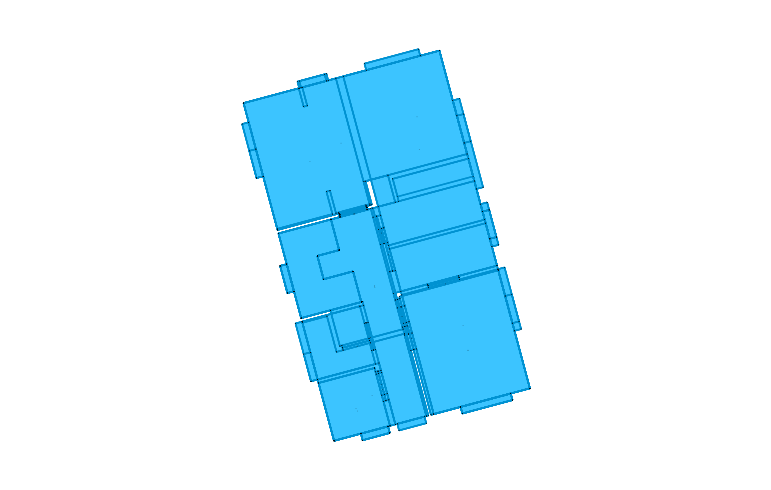

In [6]:
plotter_surface = Plotter()
plotter_surface.add(mesh_2)
plotter_surface.zoom_extents()
plotter_surface.show()

In [7]:
'''#visualize the real mesh
plotter_surface = Plotter()
plotter_surface.add(mesh_real)
plotter_surface.zoom_extents()
plotter_surface.show()'''

'#visualize the real mesh\nplotter_surface = Plotter()\nplotter_surface.add(mesh_real)\nplotter_surface.zoom_extents()\nplotter_surface.show()'

# Get the graph

## Get the nodes

In [8]:
def get_nodes_from_jsonfile(jfile):
    
    node_names = []
    nodes = []
    for spacelayer in jfile['SpaceLayers']:

        for i in jfile['SpaceLayers'][spacelayer]:
            node_names.append(i)
            for nd in node_names:
                node_id = jfile['SpaceLayers'][spacelayer][nd]['geometry']['boundaries']
            nodes.append(node_id)

    return nodes
    
nodes_1 = get_nodes_from_jsonfile(j)
nodes_2 = get_nodes_from_jsonfile(j_2)
nodes_3 = get_nodes_from_jsonfile(j_3)
print(nodes_1)
print(nodes_2)

nodes_real = get_nodes_from_jsonfile(j_real)
print(nodes_real)
nodes_new = get_nodes_from_jsonfile(j_new)
#delete
nodes_delete = get_nodes_from_jsonfile(j_delete)
print(nodes_delete)

[0, 1]
[0, 2, 8, 10, 12, 14, 16, 21, 23, 27, 30, 32, 36, 38]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209

## Get the edges

Get the cell-node pairs

def get_cell_node_pairs(jfile):
    nodes = get_nodes_from_jsonfile(jfile)
    node_names = []
    for sl in jfile['SpaceLayers']:
        for i in jfile['SpaceLayers'][sl]:
            node_names.append(i)
    cell_space_list = []
    for cell in jfile['PrimalSpaceFeatures']['CellSpace']:
        cell_space_list.append(cell)

    cell_node_pairs = dict(zip(cell_space_list,nodes))
    return cell_node_pairs

cn_pair = get_cell_node_pairs(j_2)
cn_pair_3 = get_cell_node_pairs(j_3)
print(cn_pair)

#delete
cn_pair_delete = get_cell_node_pairs(j_delete)    
print(cn_pair_delete)

Check if two cells are adjacent

# Hugo's code
def are_cells_adjacent(a, b, j):
    if a not in j['PrimalSpaceFeatures']['CellSpace']:
        return False
    if b not in j['PrimalSpaceFeatures']['CellSpace']:
        return False
    ca = j['PrimalSpaceFeatures']['CellSpace'][a]
    cb = j['PrimalSpaceFeatures']['CellSpace'][b]
    # find the dual node
    dual_ca = j['SpaceLayers'][ca['duality-spacelayer']][ca['duality']]
    dual_cb = j['SpaceLayers'][cb['duality-spacelayer']][cb['duality']]
    bFound = False
    # iterate over the edges to see whether b is in a
    for e in dual_ca['edges']:
        if (e['destination'] == cb['duality']):
            bFound = True
            break
    if (bFound == False):
        # iterate over the edges to see whether a is in b
        for e in dual_cb['edges']:
            if (e['destination'] == ca['duality']):
                bFound = True
                break
    return bFound

print(are_cells_adjacent('C1','C2',j_2))

Get all adjacent-cell pairs

# get the adjacent cell pairs
def get_adjacent_cells(cn_pair,jfile):

    cell_list = list(cn_pair.keys())
    cell_pairs = []

    adjacent_cells = []
    for i in range(len(cn_pair)):
        for j in range(i+1, len(cn_pair)):
            cell_pair = [cell_list[i],cell_list[j]]
            cell_pairs.append(cell_pair)
            check = are_cells_adjacent(cell_list[i],cell_list[j],jfile)
            if check == True:
                adjacent_cells.append(cell_pair)
                    
    return adjacent_cells

adjacent_cells = get_adjacent_cells(cn_pair, j_2)
adjacent_cells_3 = get_adjacent_cells(cn_pair_3, j_3)
print(adjacent_cells)
print(adjacent_cells_3)
#delete
adjacent_cells_delete = get_adjacent_cells(cn_pair_delete,j_delete)
print(adjacent_cells_delete)

Change the adjacent-cell pairs to adjacent-node pairs


def get_adjacent_nodes(adjacent_cells, jfile):

    adjacent_nodes = []
    for ad_cell in adjacent_cells:
        
        edge_start_node = jfile['PrimalSpaceFeatures']['CellSpace'][ad_cell[0]]['duality']
        edge_end_node = jfile['PrimalSpaceFeatures']['CellSpace'][ad_cell[1]]['duality']
        edge = [edge_start_node,edge_end_node]
        adjacent_nodes.append(edge)

    return adjacent_nodes

adjacent_nodes = get_adjacent_nodes(adjacent_cells,j_2)
adjacent_nodes_3 = get_adjacent_nodes(adjacent_cells_3,j_3)
print(adjacent_nodes)

#delete
adjacent_nodes_delete = get_adjacent_nodes(adjacent_cells_delete,j_delete)
print(adjacent_nodes_delete)

Convert the adjacent-node pairs to edges


def get_edges(adjacent_nodes, jfile):

    edges = []
    for sl in jfile['SpaceLayers']:
        for ad_node in adjacent_nodes:
            edge_start = jfile['SpaceLayers'][sl][ad_node[0]]['geometry']['boundaries']
            edge_end = jfile['SpaceLayers'][sl][ad_node[1]]['geometry']['boundaries']
            edges.append([edge_start,edge_end])

    return edges
edges_2 = get_edges(adjacent_nodes, j_2)
edges_3 = get_edges(adjacent_nodes_3, j_3)
print(edges_2)
print(len(edges_2))
#print(edges_3)
#delete
#edges_delete = get_edges(adjacent_nodes_delete,j_delete)
#print(edges_delete)

In [10]:
def get_edges(j):
    for sl in j['SpaceLayers']:

        edges_modified = []
        for node_key, node_value in j["SpaceLayers"][sl].items():
            source_boundary = node_value["geometry"]["boundaries"]
            for edge in node_value.get("edges", []):
                destination_node = j["SpaceLayers"][sl][edge["destination"]]
                destination_boundary = destination_node["geometry"]["boundaries"]
                edges_modified.append([source_boundary, destination_boundary])

    return edges_modified

edges_real = get_edges(j_real)

edges_delete = get_edges(j_delete)
print(edges_delete)
print(len(edges_real))
print(edges_real)

edges_new = get_edges(j_new)
print(len(edges_new))

#edges_3 = get_edges(j_3)

[[0, 2], [2, 1]]
470
[[50, 264], [134, 382], [134, 50], [158, 349], [193, 266], [236, 449], [236, 158], [263, 454], [263, 193], [264, 19], [264, 181], [265, 57], [265, 69], [265, 10], [266, 49], [266, 89], [267, 38], [267, 58], [268, 27], [268, 5], [269, 99], [269, 190], [270, 90], [270, 114], [271, 0], [271, 26], [272, 7], [272, 157], [273, 112], [273, 198], [274, 180], [274, 12], [275, 121], [275, 12], [276, 220], [276, 12], [277, 19], [277, 173], [278, 19], [278, 12], [279, 19], [279, 50], [280, 59], [280, 90], [281, 90], [281, 113], [282, 151], [282, 9], [283, 90], [283, 217], [284, 91], [284, 9], [285, 92], [285, 9], [286, 42], [286, 9], [287, 28], [287, 9], [288, 28], [288, 111], [289, 28], [289, 110], [290, 216], [290, 10], [291, 244], [291, 10], [292, 26], [292, 73], [293, 26], [293, 149], [294, 26], [294, 215], [295, 26], [295, 148], [296, 26], [296, 147], [297, 89], [297, 10], [298, 69], [298, 174], [299, 28], [299, 69], [300, 28], [300, 49], [301, 74], [301, 104], [302, 74],

## Create the NetworkX Graph

## get node coordinates

In [11]:
def get_node_coords(nodes, jfile):

    node_coords = {}
    for i in nodes:
        coord = jfile['vertices'][i]
        node_coords[i] = coord

    return node_coords

node_coords_2 = get_node_coords(nodes_2, j_2)
node_coords_3 = get_node_coords(nodes_3, j_3)
print(node_coords_2)

node_coords_real = get_node_coords(nodes_real, j_real)
print(node_coords_real)

node_coords_new = get_node_coords(nodes_new, j_new)
#delete
node_coords_delete = get_node_coords(nodes_delete,j_delete)
print(node_coords_delete)   

{0: [445536.499779417, 5444906.24858758, -2.02], 2: [445538.543473167, 5444902.27372664, -2.02], 8: [445537.530360026, 5444900.32919035, -2.02], 10: [445538.001981661, 5444898.38465406, -2.02], 12: [445539.940870603, 5444906.62033717, -2.02], 14: [445541.320800571, 5444901.07268952, -2.02], 16: [445538.526005699, 5444902.30232276, 0.66], 21: [445537.949579257, 5444898.47044243, 0.66], 23: [445539.871000732, 5444907.64979755, 0.66], 27: [445541.460540315, 5444900.30059423, 0.66], 30: [445537.477957622, 5444906.82051002, 3.44], 32: [445538.526005699, 5444902.33091888, 3.44], 36: [445538.456135828, 5444898.87078813, 3.44], 38: [445541.495475251, 5444900.30059423, 3.44]}
{0: [-8.052733, 30.98757, 0.0], 1: [-33.151512, 31.68331, 0.0], 2: [-40.878929, 24.653619, 4.57], 3: [-36.12081, 11.009619, 0.0], 4: [-20.182727, 35.317, 9.25], 5: [-38.358625, 31.718344, 4.57], 6: [-13.218816, 45.343605, 4.57], 7: [-8.011654, 18.634846, 0.0], 8: [-34.381143, 16.815643, 4.57], 9: [-32.874889, 48.775556, 0.

## Get the Graph with node coordinates

In [13]:
G = nx.Graph()
G.add_nodes_from(nodes_3)
#G.add_edges_from(edges_3)
nx.set_node_attributes(G, node_coords_3, 'coords')
print(len(G.nodes))
for node in G.nodes(data=True):
    print(node)

523
(0, {'coords': [-9.95975, 30.4087, 2.285]})
(1, {'coords': [-17.743, 38.583, 1.4]})
(2, {'coords': [-1.4015, 48.6385, 1.4]})
(3, {'coords': [-36.735, 16.725, 1.4]})
(4, {'coords': [-41.8235, 13.02, 1.4]})
(5, {'coords': [-45.124, 15.315, 1.4]})
(6, {'coords': [-49.6215, 15.3135, 1.4]})
(7, {'coords': [-49.6165, 5.025, 1.4]})
(8, {'coords': [-45.705, 1.2515, 1.4]})
(9, {'coords': [-45.705, 4.963, 1.4]})
(10, {'coords': [-45.705, 8.7365, 1.4]})
(11, {'coords': [-40.0762, 1.1785, 1.4]})
(12, {'coords': [-41.0192, 4.195, 1.4]})
(13, {'coords': [-5.905, 48.7385, 1.4]})
(14, {'coords': [-39.2604, 4.195, 1.4]})
(15, {'coords': [-40.1477, 8.981, 1.4]})
(16, {'coords': [-32.3722, 5.025, 1.4]})
(17, {'coords': [-25.6552, 8.0985, 1.4]})
(18, {'coords': [-22.9985, 4.407, 1.4]})
(19, {'coords': [-24.572, 1.3335, 1.4]})
(20, {'coords': [-21.4585, 1.3335, 1.4]})
(21, {'coords': [-21.1665, 8.0985, 1.4]})
(22, {'coords': [-40.1477, 6.7975, 1.4]})
(23, {'coords': [-41.954, 16.293, 1.4]})
(24, {'coor

In [12]:
G_r = nx.Graph()
G_r.add_nodes_from(nodes_real)
G_r.add_edges_from(edges_real)
nx.set_node_attributes(G_r, node_coords_real, 'coords')
print(len(G_r.nodes))
for node in G_r.nodes(data=True):
    print(node)

# the hospital graph
G_new = nx.Graph()
G_new.add_nodes_from(nodes_new)
G_new.add_edges_from(edges_new)
nx.set_node_attributes(G_new, node_coords_new, 'coords')
print(len(G_new.nodes))
for node in G_new.nodes(data=True):
    print(node)

502
(0, {'coords': [-8.052733, 30.98757, 0.0]})
(1, {'coords': [-33.151512, 31.68331, 0.0]})
(2, {'coords': [-40.878929, 24.653619, 4.57]})
(3, {'coords': [-36.12081, 11.009619, 0.0]})
(4, {'coords': [-20.182727, 35.317, 9.25]})
(5, {'coords': [-38.358625, 31.718344, 4.57]})
(6, {'coords': [-13.218816, 45.343605, 4.57]})
(7, {'coords': [-8.011654, 18.634846, 0.0]})
(8, {'coords': [-34.381143, 16.815643, 4.57]})
(9, {'coords': [-32.874889, 48.775556, 0.0]})
(10, {'coords': [-10.367429, 41.196086, 0.0]})
(11, {'coords': [-29.201833, 39.5815, 0.0]})
(12, {'coords': [-46.988, 49.9023, 0.0]})
(13, {'coords': [-2.754696, 20.201783, 0.0]})
(14, {'coords': [-18.58013, 16.250043, 0.0]})
(15, {'coords': [-8.870143, 14.058571, 4.57]})
(16, {'coords': [-7.718875, 23.449688, 4.57]})
(17, {'coords': [-33.65305, 4.5675, 0.0]})
(18, {'coords': [-16.913182, 33.221182, 4.57]})
(19, {'coords': [-38.923, 51.940632, 0.0]})
(20, {'coords': [-46.027696, 42.53887, 0.0]})
(21, {'coords': [-29.8276, 23.890267, 

## Visualize the Graph

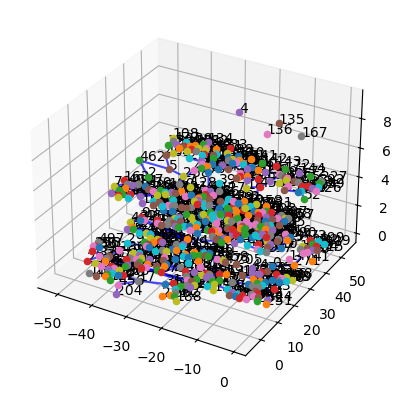

In [15]:

#visualize the hospital graph
fig_r = plt.figure()
ax = fig_r.add_subplot(111, projection='3d')

pos = nx.get_node_attributes(G_r,'coords')
for node, [x,y,z] in pos.items():
    ax.scatter(x,y,z, marker='o')
    ax.text(x,y,z,node)
for edge in G_r.edges():
    xs, ys,zs = zip(*(pos[node] for node in edge))
    ax.plot(xs,ys,zs,'b-',alpha=0.7)

plt.show()

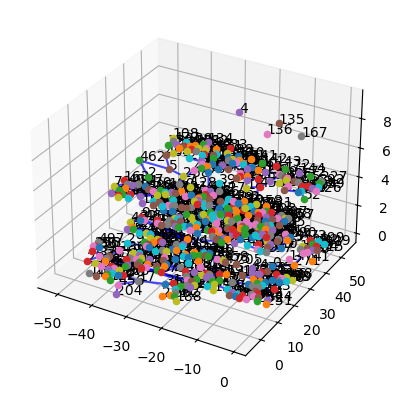

In [13]:
fig_new = plt.figure()
ax = fig_new.add_subplot(111, projection='3d')

pos = nx.get_node_attributes(G_new,'coords')
for node, [x,y,z] in pos.items():
    ax.scatter(x,y,z, marker='o')
    ax.text(x,y,z,node)
for edge in G_new.edges():
    xs, ys,zs = zip(*(pos[node] for node in edge))
    ax.plot(xs,ys,zs,'b-',alpha=0.7)

plt.show()